In [ ]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as web
import time
import math
from datetime import *

from datetime import *
from matplotlib import pyplot as plt
import yfinance as yf
from pylab import rcParams
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import *
from tqdm import tqdm_notebook
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline


#XGBoost parameters
test_size = 0.2                                                # proportion of dataset to be used as test set
cv_size = 0.2                                                   # proportion of dataset to be used as cross-validation set
N = 3                                                              # for feature at day t, we use lags from t-1, t-2, ..., t-N as features
model_seed=100
n_estimators_xgb = 100                          # Number of boosted trees to fit. default = 100
max_depth = 3                               # Maximum tree depth for base learners. default = 3
learning_rate = 0.1                         # Boosting learning rate (xgb’s “eta”). default = 0.1
min_child_weight = 1                     # Minimum sum of instance weight(hessian) needed in a child. default = 1
subsample = 1                  # Subsample ratio of the training instance. default = 1
colsample_bytree = 1           # Subsample ratio of columns when constructing each tree. default = 1
colsample_bylevel = 1          # Subsample ratio of columns for each split, in each level. default = 1
gamma = 0                      # Minimum loss reduction required to make a further partition on a leaf node of the tree. default=0

#Random Forest parameters
random_state=42
n_estimators_rf=500
min_samples_split=2
min_samples_leaf=1
max_depth=10
bootstrap=True
test_size=0.2
cv_size=0.2

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 19.2 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['^FTSE']
from datetime import datetime
#startdate = datetime(2010,1,1)
#enddate = datetime(2022,3,31)

startdate = datetime(2010,1,1)
enddate = datetime(2023,3,10)
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

[*********************100%***********************]  1 of 1 completed


In [ ]:
pip install hampel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Outlier Indices:  [86, 226, 252, 353, 354, 462, 532, 549, 725, 949, 1177, 1178, 1240, 1334, 1459, 1533, 1572, 1609, 1682, 1714, 2078, 2139, 2269, 2651, 2817, 2872, 2875, 2907, 3068, 3156, 3163, 3204]


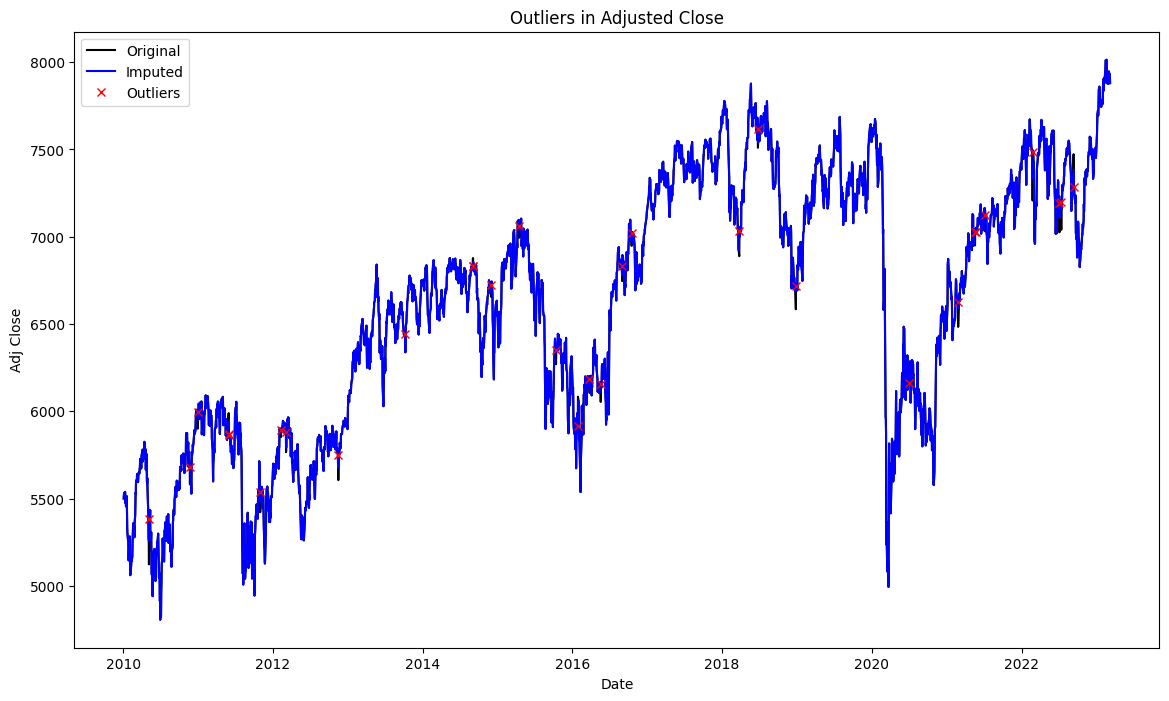

In [ ]:
from hampel import hampel

# Select the 'Adj Close' column as a pandas Series object
ts_adj_close = df['Adj Close']
# Create a figure and axis object with a larger size
fig, ax = plt.subplots(figsize=(14, 8))

# Just outlier detection
outlier_indices = hampel(ts_adj_close, window_size=5, n=3)
print("Outlier Indices: ", outlier_indices)

# Outlier Imputation with rolling median
ts_imputation_adj_close = hampel(ts_adj_close, window_size=5, n=3, imputation=True)

# Plot the original and imputed series
ax.plot(ts_adj_close.index, ts_adj_close, 'k-', label='Original')
ax.plot(ts_imputation_adj_close.index, ts_imputation_adj_close, 'b', label='Imputed')
ax.plot(ts_imputation_adj_close.iloc[outlier_indices].index,
         ts_imputation_adj_close.iloc[outlier_indices], 'rx', label='Outliers')

# Add legend and axis labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
ax.set_title('Outliers in Adjusted Close')

plt.show()

Outlier Indices:  [0, 87, 227, 253, 354, 355, 463, 533, 550, 726, 950, 1178, 1179, 1241, 1335, 1460, 1534, 1573, 1610, 1683, 1715, 2079, 2140, 2270, 2652, 2818, 2873, 2876, 2908, 3069, 3157, 3164, 3205]


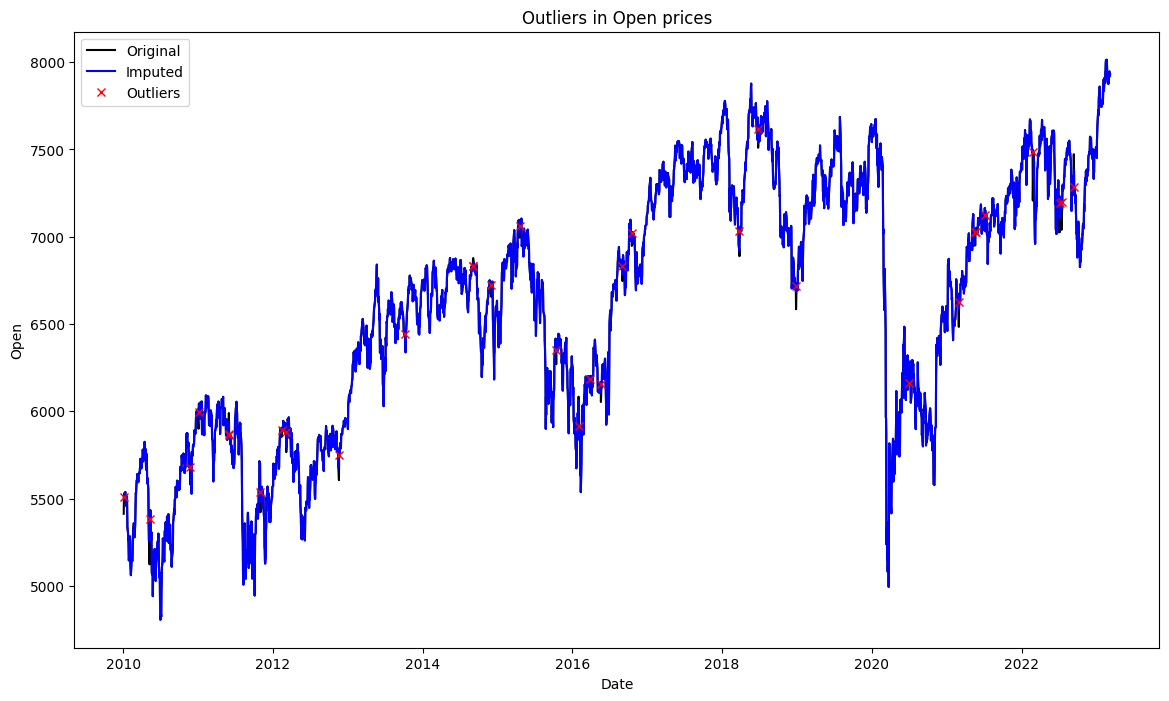

In [ ]:
from hampel import hampel

# Select the 'Adj Close' column as a pandas Series object
ts_open = df['Open']
# Create a figure and axis object with a larger size
fig, ax = plt.subplots(figsize=(14, 8))

# Just outlier detection
outlier_indices = hampel(ts_open, window_size=5, n=3)
print("Outlier Indices: ", outlier_indices)

# Outlier Imputation with rolling median
ts_imputation_open = hampel(ts_open, window_size=5, n=3, imputation=True)

# Plot the original and imputed series
ax.plot(ts_open.index, ts_open, 'k-', label='Original')
ax.plot(ts_imputation_open.index, ts_imputation_open, 'b', label='Imputed')
ax.plot(ts_imputation_open.iloc[outlier_indices].index,
         ts_imputation_open.iloc[outlier_indices], 'rx', label='Outliers')

# Add legend and axis labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Open')
ax.set_title('Outliers in Open prices')

plt.show()

Outlier Indices:  [5, 145, 272, 461, 469, 1264, 1527, 1732, 1875, 1880, 1896, 2078, 2146, 2247, 2407, 2436, 2529, 2537, 2547, 2598, 2607, 2608, 2748, 2754, 2958, 2966, 3100, 3251, 3324]


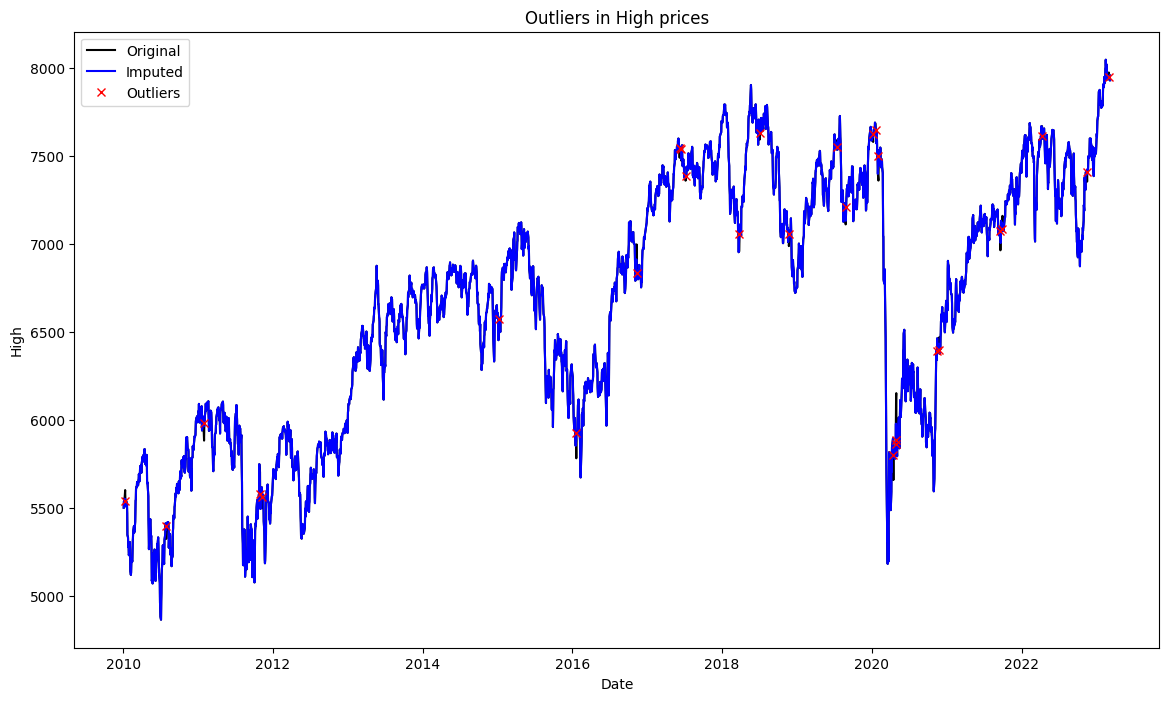

In [ ]:
from hampel import hampel

# Select the 'Adj Close' column as a pandas Series object
ts_high = df['High']
# Create a figure and axis object with a larger size
fig, ax = plt.subplots(figsize=(14, 8))

# Just outlier detection
outlier_indices = hampel(ts_high, window_size=5, n=3)
print("Outlier Indices: ", outlier_indices)

# Outlier Imputation with rolling median
ts_imputation_high = hampel(ts_high, window_size=5, n=3, imputation=True)

# Plot the original and imputed series
ax.plot(ts_high.index, ts_high, 'k-', label='Original')
ax.plot(ts_imputation_high.index, ts_imputation_high, 'b', label='Imputed')
ax.plot(ts_imputation_high.iloc[outlier_indices].index,
         ts_imputation_high.iloc[outlier_indices], 'rx', label='Outliers')

# Add legend and axis labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('High')
ax.set_title('Outliers in High prices')

plt.show()

Outlier Indices:  [86, 226, 252, 353, 354, 462, 532, 549, 725, 949, 1177, 1178, 1240, 1334, 1459, 1533, 1572, 1609, 1682, 1714, 2078, 2139, 2269, 2651, 2817, 2872, 2875, 2907, 3068, 3156, 3163, 3204]


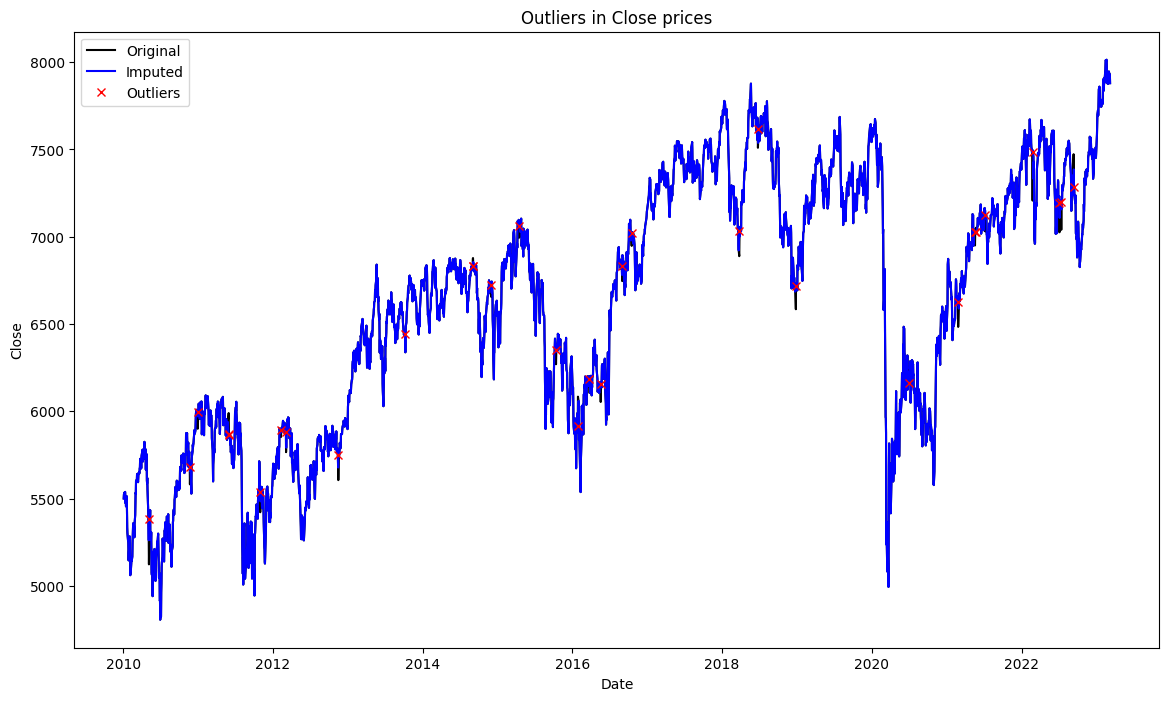

In [ ]:
from hampel import hampel

# Select the 'Adj Close' column as a pandas Series object
ts_close = df['Close']
# Create a figure and axis object with a larger size
fig, ax = plt.subplots(figsize=(14, 8))

# Just outlier detection
outlier_indices = hampel(ts_close, window_size=5, n=3)
print("Outlier Indices: ", outlier_indices)

# Outlier Imputation with rolling median
ts_imputation_close = hampel(ts_close, window_size=5, n=3, imputation=True)

# Plot the original and imputed series
ax.plot(ts_close.index, ts_close, 'k-', label='Original')
ax.plot(ts_imputation_close.index, ts_imputation_close, 'b', label='Imputed')
ax.plot(ts_imputation_close.iloc[outlier_indices].index,
         ts_imputation_close.iloc[outlier_indices], 'rx', label='Outliers')

# Add legend and axis labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Outliers in Close prices')

plt.show()

Outlier Indices:  [9, 30, 49, 54, 115, 142, 179, 185, 188, 210, 244, 266, 282, 306, 336, 337, 357, 365, 366, 375, 377, 383, 483, 495, 511, 557, 564, 599, 616, 626, 641, 680, 685, 788, 807, 837, 838, 873, 937, 975, 984, 990, 1019, 1064, 1067, 1110, 1125, 1129, 1189, 1207, 1208, 1219, 1225, 1245, 1246, 1316, 1348, 1362, 1377, 1384, 1409, 1423, 1432, 1441, 1497, 1517, 1522, 1523, 1540, 1568, 1616, 1629, 1634, 1658, 1693, 1703, 1705, 1746, 1820, 1830, 1869, 1881, 1944, 1945, 1963, 1987, 2044, 2072, 2102, 2120, 2122, 2133, 2140, 2141, 2176, 2202, 2216, 2224, 2252, 2267, 2277, 2324, 2337, 2372, 2390, 2421, 2436, 2440, 2454, 2501, 2505, 2506, 2514, 2537, 2549, 2566, 2581, 2587, 2608, 2627, 2642, 2671, 2706, 2707, 2718, 2734, 2742, 2788, 2795, 2807, 2829, 2830, 2832, 2852, 2878, 2884, 2893, 2936, 2944, 2957, 3002, 3007, 3009, 3045, 3049, 3075, 3082, 3084, 3105, 3125, 3133, 3144, 3167, 3195, 3208, 3215, 3260, 3272, 3300, 3314]


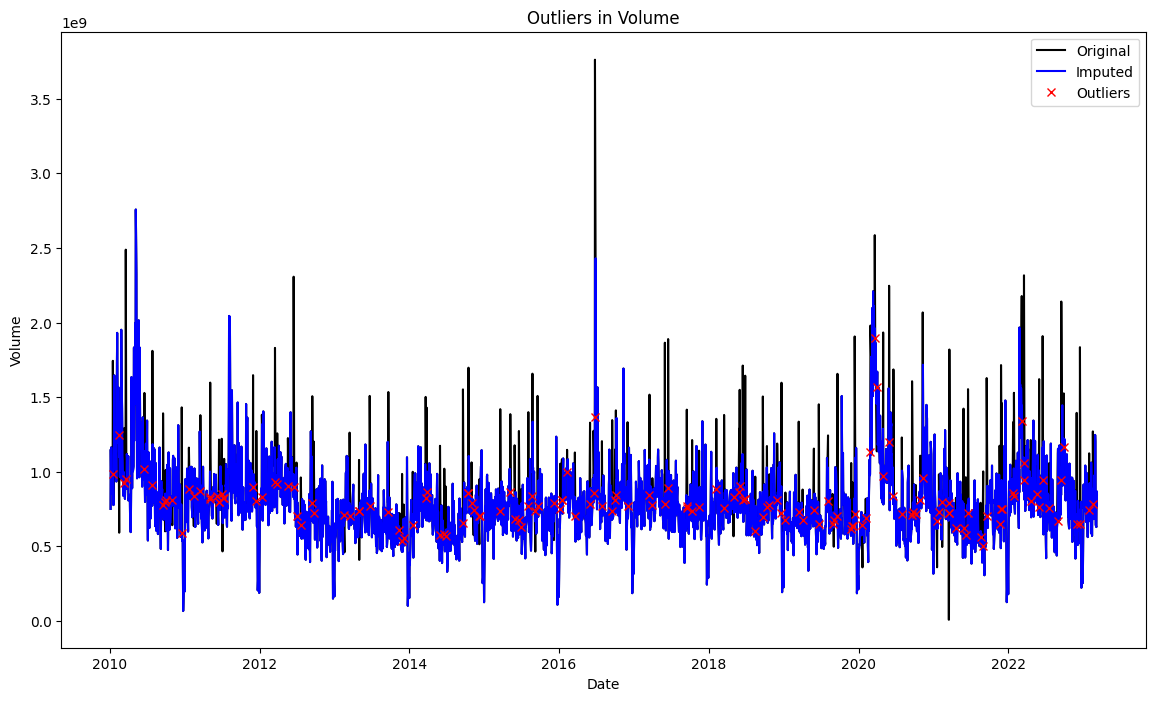

In [ ]:
from hampel import hampel

# Select the 'Adj Close' column as a pandas Series object
ts_volume = df['Volume']
# Create a figure and axis object with a larger size
fig, ax = plt.subplots(figsize=(14, 8))

# Just outlier detection
outlier_indices = hampel(ts_volume, window_size=5, n=3)
print("Outlier Indices: ", outlier_indices)

# Outlier Imputation with rolling median
ts_imputation_volume = hampel(ts_volume, window_size=5, n=3, imputation=True)

# Plot the original and imputed series
ax.plot(ts_volume.index, ts_volume, 'k-', label='Original')
ax.plot(ts_imputation_volume.index, ts_imputation_volume, 'b', label='Imputed')
ax.plot(ts_imputation_volume.iloc[outlier_indices].index,
         ts_imputation_volume.iloc[outlier_indices], 'rx', label='Outliers')

# Add legend and axis labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_title('Outliers in Volume')

plt.show()

Outlier Indices:  [90, 252, 253, 418, 419, 605, 790, 852, 867, 965, 1347, 1534, 1562, 1563, 1805, 1814, 1980, 2068, 2150, 2167, 2285, 2436, 2470, 2471, 2588, 2607, 2680, 2681, 2772, 2865, 2958, 3100]


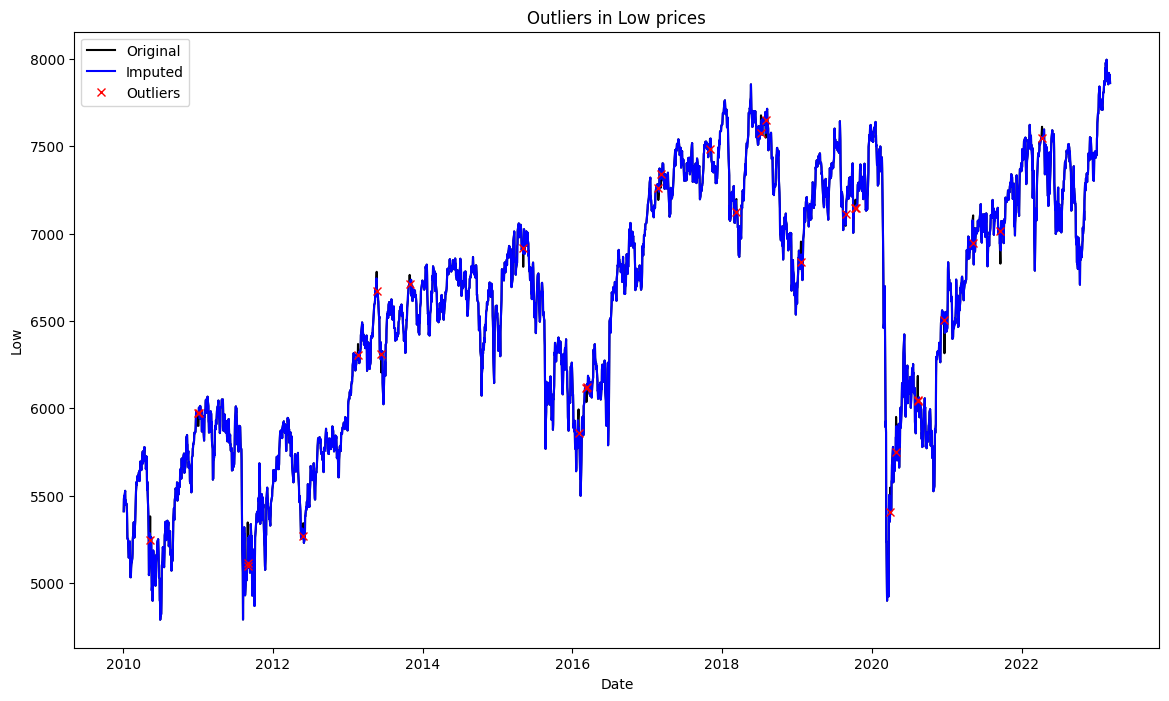

In [ ]:
from hampel import hampel

# Select the 'Adj Close' column as a pandas Series object
ts_low = df['Low']
# Create a figure and axis object with a larger size
fig, ax = plt.subplots(figsize=(14, 8))

# Just outlier detection
outlier_indices = hampel(ts_low, window_size=5, n=3)
print("Outlier Indices: ", outlier_indices)

# Outlier Imputation with rolling median
ts_imputation_low = hampel(ts_low, window_size=5, n=3, imputation=True)

# Plot the original and imputed series
ax.plot(ts_low.index, ts_low, 'k-', label='Original')
ax.plot(ts_imputation_low.index, ts_imputation_low, 'b', label='Imputed')
ax.plot(ts_imputation_low.iloc[outlier_indices].index,
         ts_imputation_low.iloc[outlier_indices], 'rx', label='Outliers')

# Add legend and axis labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Low')
ax.set_title('Outliers in Low prices')
plt.show()

In [ ]:
df = pd.concat([ts_imputation_open, ts_imputation_high, ts_imputation_low, ts_imputation_close, ts_imputation_adj_close, ts_imputation_volume], axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5511.399902,5500.299805,5410.799805,5500.299805,5500.299805,750942000
2010-01-05,5500.299805,5536.399902,5480.700195,5522.500000,5522.500000,1149301200
2010-01-06,5522.500000,5536.500000,5497.700195,5530.000000,5530.000000,998295300
2010-01-07,5530.000000,5551.700195,5499.799805,5526.700195,5526.700195,1162933700
2010-01-08,5526.700195,5549.299805,5494.799805,5534.200195,5534.200195,1006420600


Text(0.5, 1.0, 'Daily Adjusted Close prices of FTSE 100 index over 2010-2023 period')

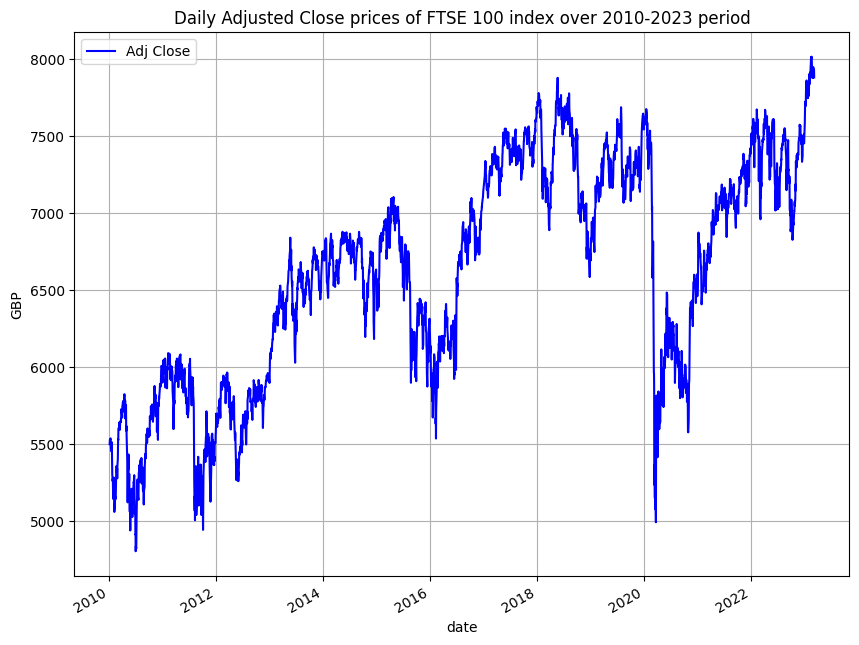

In [ ]:
# Plot adjusted close over time
df.reset_index(inplace=True)
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = df.plot(x='Date', y='Adj Close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("GBP")
ax.set_title('Daily Adjusted Close prices of FTSE 100 index over 2010-2023 period')

In [ ]:
from sklearn.model_selection import train_test_split
df=df.reset_index()
X=df[['Date','Open','High','Low','Close','Volume']]
y=df[['Date','Adj Close']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2663, 6)
(666, 6)
(2663, 2)
(666, 2)


In [ ]:
x_train.set_index("Date", inplace=True)
x_test.set_index('Date',inplace=True)
y_train.set_index('Date',inplace=True)
y_test.set_index('Date',inplace=True)

In [ ]:
#@title Xgboost without scaling
model_xgb = XGBRegressor(seed=model_seed,
                     n_estimators=n_estimators_xgb,
                     max_depth=max_depth,
                     learning_rate=learning_rate,
                     min_child_weight=min_child_weight,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree,
                     colsample_bylevel=colsample_bylevel,
                     gamma=gamma)

# Train the regressor
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#@title Fitting the mode on train set
est_scaled = model_xgb.predict(x_train)
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(y_train, est_scaled))
print("RMSE on train set:", rmse)
mape = mean_absolute_percentage_error(y_train,est_scaled)
print("MAPE on train set:", mape)
r2_xgb_train = r2_score(y_train, est_scaled)
print('R-squared on train set',r2_xgb_train)

RMSE on train set: 3.5702123933417163
MAPE on train set: 0.00042246169877083666
R-squared on train set 0.9999753285887223


In [ ]:
y_train=y_train.reset_index()
pred_df = pd.DataFrame({'pred': est_scaled})

# concatenate y_test and pred_df along the column axis
result_df = pd.concat([y_train[['Date', 'Adj Close']], pred_df], axis=1)

# display the resulting DataFrame
print(result_df)

           Date    Adj Close         pred
0    2010-01-04  5500.299805  5499.709961
1    2010-01-05  5522.500000  5522.910156
2    2010-01-06  5530.000000  5528.736816
3    2010-01-07  5526.700195  5525.781250
4    2010-01-08  5534.200195  5531.330566
...         ...          ...          ...
2658 2020-07-13  6176.200195  6180.696777
2659 2020-07-14  6179.799805  6181.993652
2660 2020-07-15  6292.700195  6296.664551
2661 2020-07-16  6250.700195  6252.600586
2662 2020-07-17  6290.299805  6295.011719

[2663 rows x 3 columns]


In [ ]:
y_train.Date

0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
2651   2020-07-02
2652   2020-07-03
2653   2020-07-06
2654   2020-07-07
2655   2020-07-08
Name: Date, Length: 2656, dtype: datetime64[ns]

[]

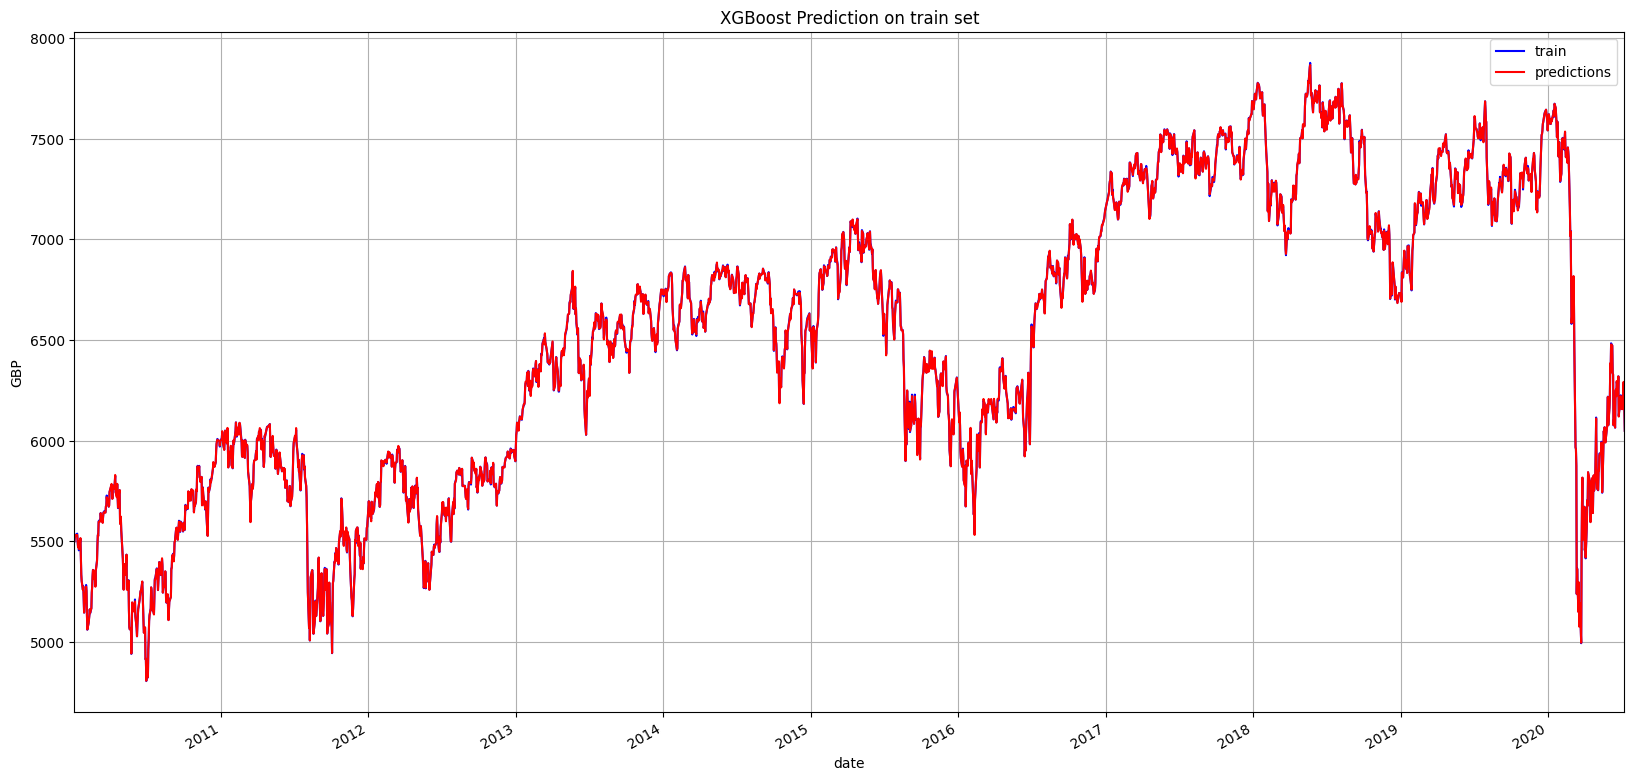

In [ ]:
rcParams['figure.figsize'] = 20, 10 # width 10, height 8
ax = y_train.plot(x='Date', y='Adj Close', style='b-', grid=True)
ax = result_df.plot(x='Date', y='pred', style='r-', grid=True, ax=ax)
ax.legend(['train', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("GBP")
ax.set_xlim([date(2010, 1, 4), date(2020, 7, 8)])
#ax.set_ylim([130, 155])
ax.set_title("XGBoost Prediction on train set")
ax.plot()

In [ ]:
#@title fitting the model on test set
est = model_xgb.predict(x_test)
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
rmse_bef_tuning = np.sqrt(mean_squared_error(y_test, est))
print("RMSE:", rmse_bef_tuning)
mape_bef_tuning = mean_absolute_percentage_error(y_test,est)
print("MAPE:", mape_bef_tuning)
r2_xgb = r2_score(y_test, est)
print("Xgboost R-squared score:", r2_xgb)

RMSE: 15.640498237546389
MAPE: 0.0008075368607650152
Xgboost R-squared score: 0.9991276383579535


In [ ]:
y_test=y_test.reset_index()
pred_df = pd.DataFrame({'pred': est})

# concatenate y_test and pred_df along the column axis
result_df = pd.concat([y_test[['Date', 'Adj Close']], pred_df], axis=1)

# display the resulting DataFrame
print(result_df)

          Date    Adj Close         pred
0   2020-07-20  6261.500000  6258.408203
1   2020-07-21  6269.700195  6267.818848
2   2020-07-22  6207.100098  6213.264648
3   2020-07-23  6211.399902  6214.078613
4   2020-07-24  6123.799805  6118.762207
..         ...          ...          ...
661 2023-03-03  7947.100098  7866.793945
662 2023-03-06  7929.799805  7866.793945
663 2023-03-07  7919.500000  7866.793945
664 2023-03-08  7929.899902  7866.793945
665 2023-03-09  7880.000000  7866.793945

[666 rows x 3 columns]


[]

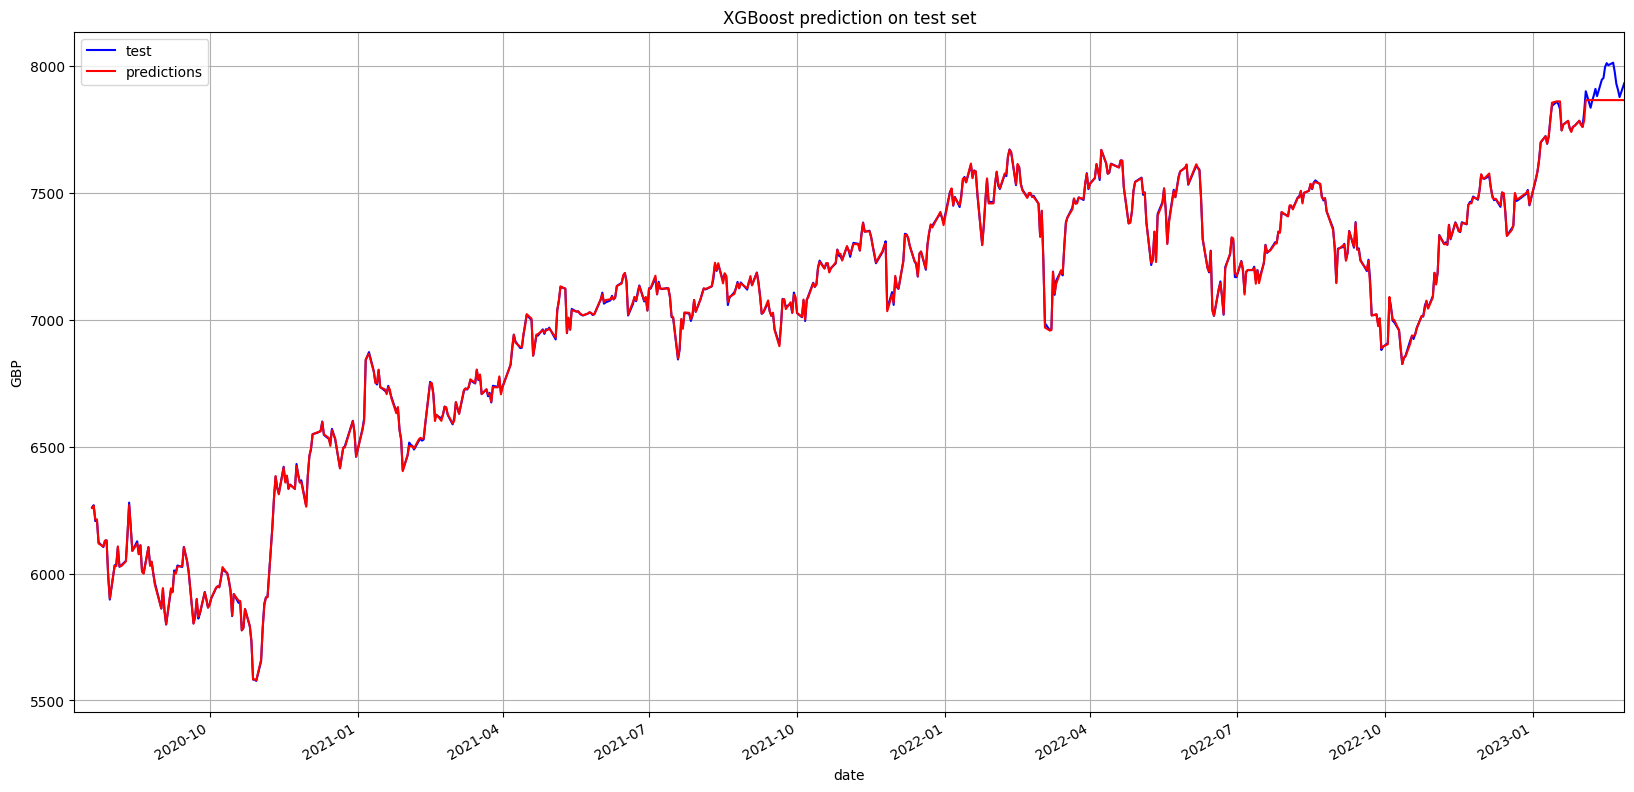

In [ ]:
rcParams['figure.figsize'] = 20, 10 # width 10, height 8
ax = y_test.plot(x='Date', y='Adj Close', style='b-', grid=True)
ax = result_df.plot(x='Date', y='pred', style='r-', grid=True, ax=ax)
ax.legend(['test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("GBP")
ax.set_xlim([date(2020, 7, 9), date(2023, 2, 27)])
#ax.set_ylim([130, 155])
ax.set_title("XGBoost prediction on test set")
ax.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

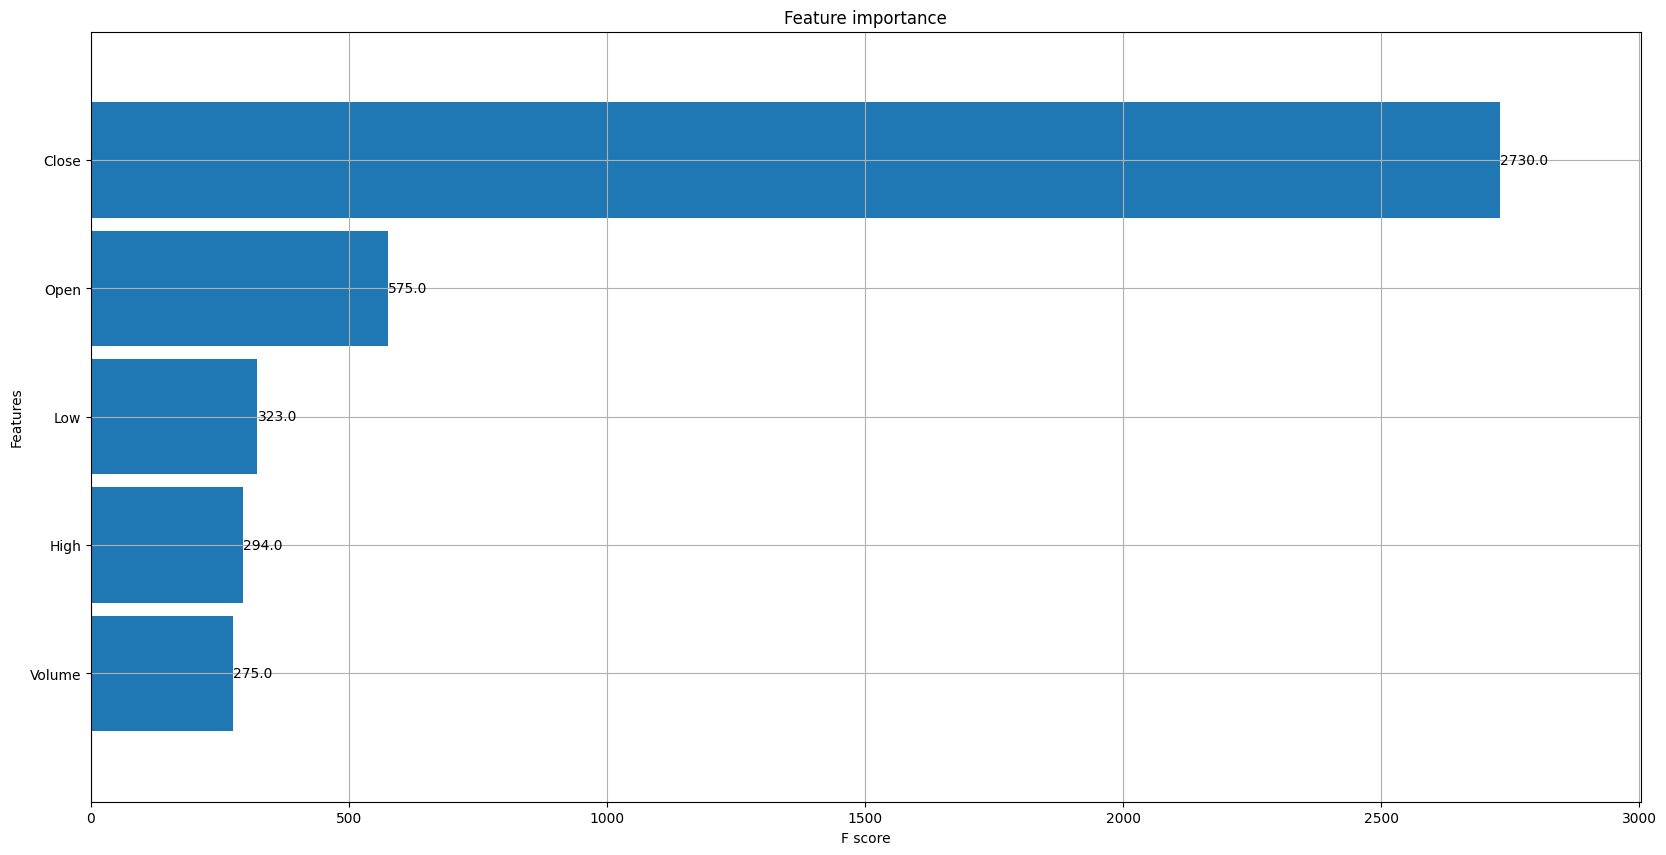

In [ ]:
import xgboost as xgb
xgb.plot_importance(model_xgb,height=0.9)

In [ ]:
x_train

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,5511.399902,5500.299805,5410.799805,5500.299805,7.509420e+08
2010-01-05,5500.299805,5536.399902,5480.700195,5522.500000,1.149301e+09
2010-01-06,5522.500000,5536.500000,5497.700195,5530.000000,9.982953e+08
2010-01-07,5530.000000,5551.700195,5499.799805,5526.700195,1.162934e+09
2010-01-08,5526.700195,5549.299805,5494.799805,5534.200195,1.006421e+09
...,...,...,...,...,...
2020-07-13,6095.399902,6187.299805,6095.399902,6176.200195,6.142411e+08
2020-07-14,6176.200195,6179.799805,6093.200195,6179.799805,7.175469e+08
2020-07-15,6179.799805,6323.600098,6179.799805,6292.700195,7.473020e+08


In [ ]:
#@title Without scaling
grid_xgb = {
'n_estimators': range(10,310,10),
'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3],
'min_child_weight': range(5, 21, 1),
'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
'colsample_by_tree':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
'colsample_by_level':[0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
rscv_xgb = RandomizedSearchCV(estimator=model_xgb, param_distributions=grid_xgb, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit_xgb = rscv_xgb.fit(x_train,y_train)
best_parameters = rscv_fit_xgb.best_params_
best_score=rscv_fit_xgb.best_score_
best = rscv_xgb.best_estimator_
print('Best hyperparameters:',best_parameters)
print('Best score: {:.2f}'.format(best_score))
r2_xgb_opt = r2_score(y_pred=best.predict(x_test), y_true=y_test)
print("Xgboost R-squared score:", r2_xgb_opt)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[10:50:44] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_by_level", "colsample_by_tree" } are not used.

Best hyperparameters: {'subsample': 0.9, 'n_estimators': 270, 'min_child_weight': 6, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 0.7, 'colsample_by_tree': 1, 'colsample_by_level': 0.5}
Best score: 0.95
Xgboost R-squared score: 0.9979344802036115


In [ ]:
#@title Performance metrices after hyperparameter tuning
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_percentage_error
rmse_aft_tuning = np.sqrt(mean_squared_error(y_true=y_test,y_pred=best.predict(x_test)))
print("RMSE:", rmse_aft_tuning)
mape_aft_tuning = mean_absolute_percentage_error(y_true=y_test,y_pred=best.predict(x_test))
print("MAPE:", mape_aft_tuning)

RMSE: 24.06672435510648
MAPE: 0.0011614741297279326


In [ ]:
d = {'param': ['n_estimators', 'max_depth', 'learning_rate', 'min_child_weight', 'subsample', 'colsample_bytree', 'colsample_bylevel', 'gamma', 'rmse', 'mape_pct','R-squared'],
     'original': [n_estimators_xgb, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree, colsample_bylevel, gamma, 15.640498237546389,0.0008075368607650152,0.9992722669676247],
     'after_tuning': [190, 5, 0.2, 5, 0.8, 0.9,0.7, 1, 22.255178645800804, 0.0011062734808345539, 0.9982337280844027]}
tuned_params = pd.DataFrame(d)
tuned_params = tuned_params.round(3)
tuned_params

,param,original,after_tuning
0,n_estimators,100.000,190.000
1,max_depth,10.000,5.000
2,learning_rate,0.100,0.200
3,min_child_weight,1.000,5.000
4,subsample,1.000,0.800
5,colsample_bytree,1.000,0.900
6,colsample_bylevel,1.000,0.700
7,gamma,0.000,1.000
8,rmse,15.640,22.255
9,mape_pct,0.001,0.001


In [ ]:
#@title Random Forest without scaling
model_rf = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
  # Train the model
model_rf.fit(x_train, y_train)

<ipython-input-36-3529ca6cf760>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [ ]:
#@title without scaling on train set
est_scaled = model_rf.predict(x_train)
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_percentage_error
rmse_bef_tuning = np.sqrt(mean_squared_error(y_train, est_scaled))
print("RMSE:", rmse_bef_tuning)
mape_bef_tuning = mean_absolute_percentage_error(y_train,est_scaled)
print("MAPE:", mape_bef_tuning)

RMSE: 1.1303273468355421
MAPE: 6.402228934115143e-05


In [ ]:
y_train=y_train.reset_index()
pred_df = pd.DataFrame({'pred': est_scaled})

# concatenate y_test and pred_df along the column axis
result_df = pd.concat([y_train[['Date', 'Adj Close']], pred_df], axis=1)

# display the resulting DataFrame
print(result_df)

           Date    Adj Close         pred
0    2010-01-04  5500.299805  5499.852167
1    2010-01-05  5522.500000  5523.609295
2    2010-01-06  5530.000000  5529.383350
3    2010-01-07  5526.700195  5527.095248
4    2010-01-08  5534.200195  5534.052292
...         ...          ...          ...
2658 2020-07-13  6176.200195  6175.771526
2659 2020-07-14  6179.799805  6179.206623
2660 2020-07-15  6292.700195  6292.317604
2661 2020-07-16  6250.700195  6250.602728
2662 2020-07-17  6290.299805  6291.398149

[2663 rows x 3 columns]


[]

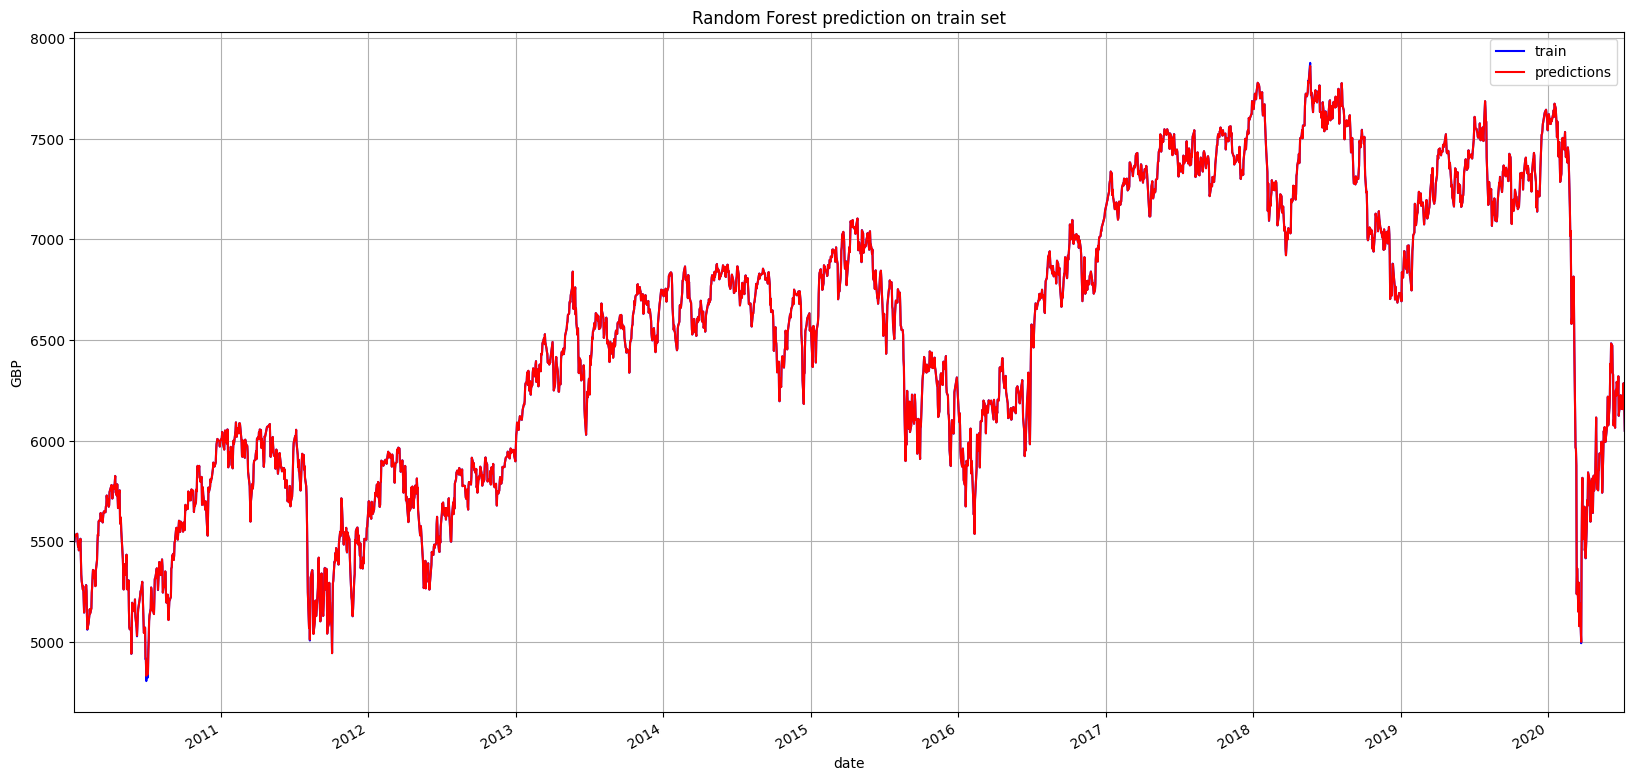

In [ ]:
rcParams['figure.figsize'] = 20, 10 # width 10, height 8
ax = y_train.plot(x='Date', y='Adj Close', style='b-', grid=True)
ax = result_df.plot(x='Date', y='pred', style='r-', grid=True, ax=ax)
ax.legend(['train', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("GBP")
ax.set_xlim([date(2010, 1, 4), date(2020, 7, 8)])
#ax.set_ylim([130, 155])
ax.set_title("Random Forest prediction on train set")
ax.plot()

In [ ]:
#@title without scaling on test set
est_scaled = model_rf.predict(x_test)
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_percentage_error
rmse_bef_tuning = np.sqrt(mean_squared_error(y_test, est_scaled))
print("RMSE:", rmse_bef_tuning)
mape_bef_tuning = mean_absolute_percentage_error(y_test,est_scaled)
print("MAPE:", mape_bef_tuning)

RMSE: 15.845072679049538
MAPE: 0.0004347881095020332


In [ ]:
r2_rf = r2_score(y_test, est_scaled)
print("Random Forest R-squared score:", r2_rf)

Random Forest R-squared score: 0.999104668498345


In [ ]:
y_test=y_test.reset_index()
pred_df = pd.DataFrame({'pred': est})

# concatenate y_test and pred_df along the column axis
result_df = pd.concat([y_test[['Date', 'Adj Close']], pred_df], axis=1)

# display the resulting DataFrame
print(result_df)

          Date    Adj Close         pred
0   2020-07-20  6261.500000  6258.408203
1   2020-07-21  6269.700195  6267.818848
2   2020-07-22  6207.100098  6213.264648
3   2020-07-23  6211.399902  6214.078613
4   2020-07-24  6123.799805  6118.762207
..         ...          ...          ...
661 2023-03-03  7947.100098  7866.793945
662 2023-03-06  7929.799805  7866.793945
663 2023-03-07  7919.500000  7866.793945
664 2023-03-08  7929.899902  7866.793945
665 2023-03-09  7880.000000  7866.793945

[666 rows x 3 columns]


[]

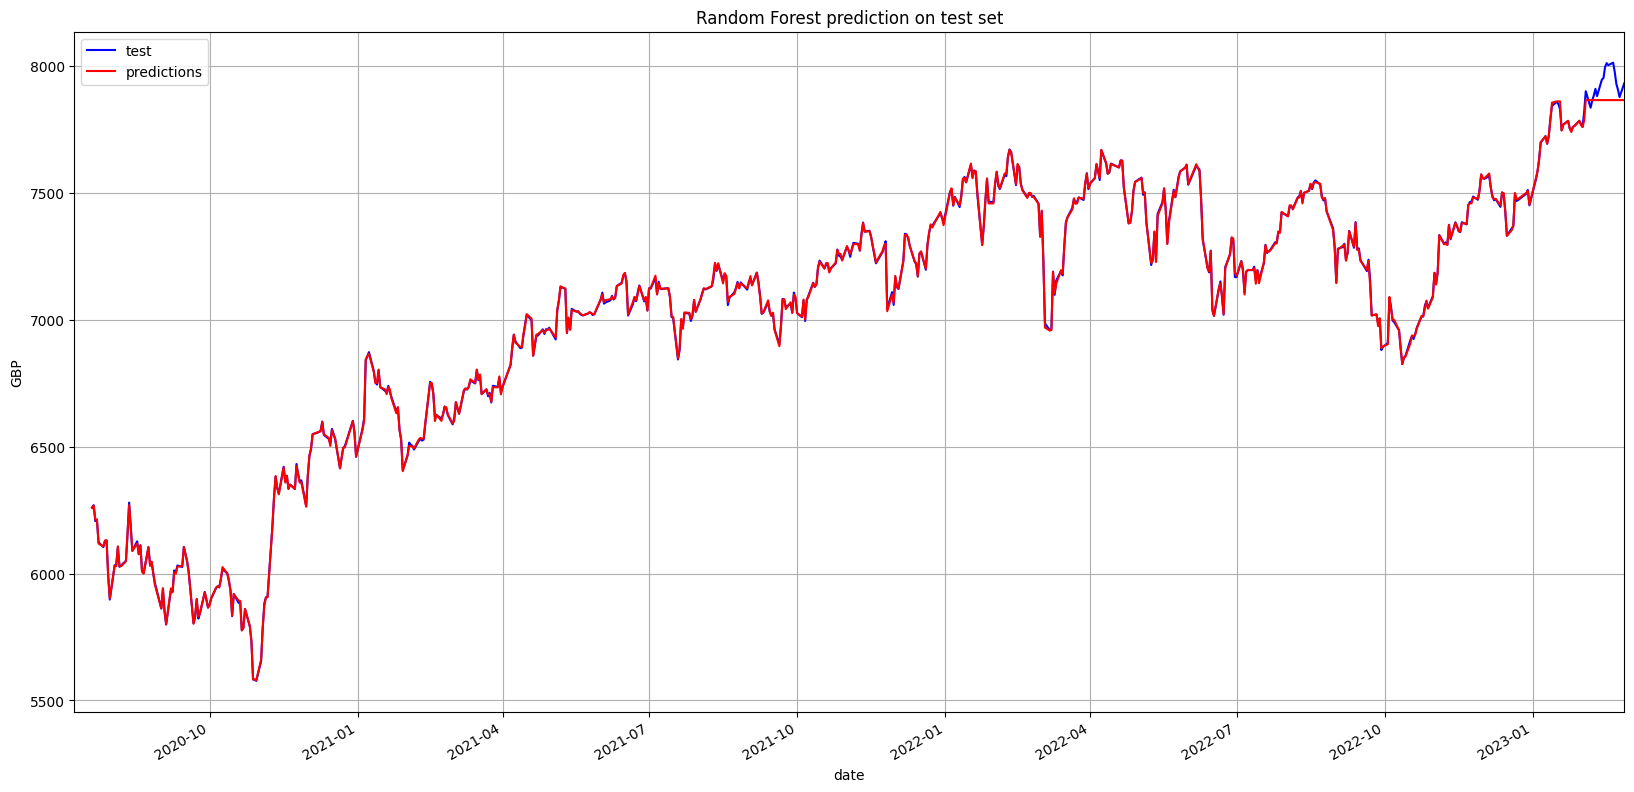

In [ ]:
rcParams['figure.figsize'] = 20, 10 # width 10, height 8
ax = y_test.plot(x='Date', y='Adj Close', style='b-', grid=True)
ax = result_df.plot(x='Date', y='pred', style='r-', grid=True, ax=ax)
ax.legend(['test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("GBP")
ax.set_xlim([date(2020, 7, 9), date(2023, 2, 27)])
#ax.set_ylim([130, 155])
ax.set_title("Random Forest prediction on test set")
ax.plot()

In [ ]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],
'max_depth': np.arange(1, 15, 1),
'min_samples_split': [2, 10, 9],
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
'bootstrap': [True, False],
'random_state': [1, 2, 30, 42]
}
rscv_rf= RandomizedSearchCV(estimator=model_rf, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit_rf = rscv_rf.fit(x_train,y_train)
best_parameters = rscv_fit_rf.best_params_
best_score=rscv_fit_rf.best_score_
best = rscv_rf.best_estimator_
r2_rf_opt = r2_score(y_pred=best.predict(x_test), y_true=y_test)
rmse_after_tuning = np.sqrt(mean_squared_error(y_pred=best.predict(x_test), y_true=y_test))
mape_aft_tuning = mean_absolute_percentage_error(y_pred=best.predict(x_test),y_true=y_test)

print('Best hyperparameters:',best_parameters)
print('Best score: {:.2f}'.format(best_score))
print("Random forest R-squared score:", r2_rf_opt)
print('RMSE:',rmse_after_tuning)
print("MAPE:", mape_aft_tuning)


Fitting 3 folds for each of 200 candidates, totalling 600 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best hyperparameters: {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 11, 'bootstrap': False}
Best score: 0.97
Random forest R-squared score: 0.9993300756133328
RMSE: 13.708027231401049
MAPE: 0.0004236054083683707


In [ ]:
d = {'param': ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'random_state', 'bootstrap', 'rmse', 'mape_pct','R-squared'],
     'original': [n_estimators_rf, max_depth, min_samples_split,min_samples_leaf,random_state,bootstrap, 14.336570786953821,0.0003517197295187906,0.9992634423596419],
     'after_tuning': [100, 12, 2,1,1,False, 13.716645710273717, 0.00042138236112605217,0.9993290483324585]}
tuned_params = pd.DataFrame(d)
tuned_params = tuned_params.round(3)
tuned_params

,param,original,after_tuning
0,n_estimators,500,100
1,max_depth,10,12
2,min_samples_split,2,2
3,min_samples_leaf,1,1
4,random_state,42,1
5,bootstrap,True,False
6,rmse,14.336571,13.716646
7,mape_pct,0.000352,0.000421
8,R-squared,0.999263,0.999329


In [ ]:
#@title Ensembe Learning
best_model_xgb=rscv_xgb.best_estimator_
best_model_rf=rscv_rf.best_estimator_

In [ ]:
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(
    estimators=[('xgb',best_model_xgb),('rf',best_model_rf)])

In [ ]:
#@title Fitting the model on train set
voting_reg=voting_reg.fit(x_train,y_train)
pred=voting_reg.predict(x_train)
r2_ensemble = r2_score(y_train, pred)
print("Ensemble R-squared score:", r2_ensemble)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11:27:44] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_by_level", "colsample_by_tree" } are not used.

Ensemble R-squared score: 0.9999845034185069


In [ ]:
#@title Fitting the model on test set
voting_reg=voting_reg.fit(x_train,y_train)
pred=voting_reg.predict(x_test)
r2_ensemble = r2_score(y_test, pred)
print("Ensemble R-squared score:", r2_ensemble)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11:27:48] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_by_level", "colsample_by_tree" } are not used.

Ensemble R-squared score: 0.9987951581799936


In [ ]:
#@title Evaluation metrics on test set
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)
mape = mean_absolute_percentage_error(y_test,pred)
print("MAPE:", mape)

RMSE: 18.383452681382117
MAPE: 0.0007143706072742571


In [ ]:
y_test.reset_index(inplace=True)

In [ ]:
pred_df = pd.DataFrame({'pred': pred})

# concatenate y_test and pred_df along the column axis
result_df = pd.concat([y_test[['Date', 'Adj Close']], pred_df], axis=1)

# display the resulting DataFrame
print(result_df)

          Date    Adj Close         pred
0   2020-07-20  6261.500000  6263.433420
1   2020-07-21  6269.700195  6267.332910
2   2020-07-22  6207.100098  6204.191738
3   2020-07-23  6211.399902  6204.311738
4   2020-07-24  6123.799805  6123.793804
..         ...          ...          ...
661 2023-03-03  7947.100098  7846.038457
662 2023-03-06  7929.799805  7846.038457
663 2023-03-07  7919.500000  7847.488525
664 2023-03-08  7929.899902  7847.502441
665 2023-03-09  7880.000000  7847.488525

[666 rows x 3 columns]


In [ ]:
result_df

,Date,Adj Close,pred
0,2020-07-20,6261.500000,6260.758955
1,2020-07-21,6269.700195,6269.748450
2,2020-07-22,6207.100098,6212.556191
3,2020-07-23,6211.399902,6213.302119
4,2020-07-24,6123.799805,6128.059192
...,...,...,...
661,2023-03-03,7947.100098,7863.482412
662,2023-03-06,7929.799805,7863.482412
663,2023-03-07,7919.500000,7851.590088
664,2023-03-08,7929.899902,7865.323975


[]

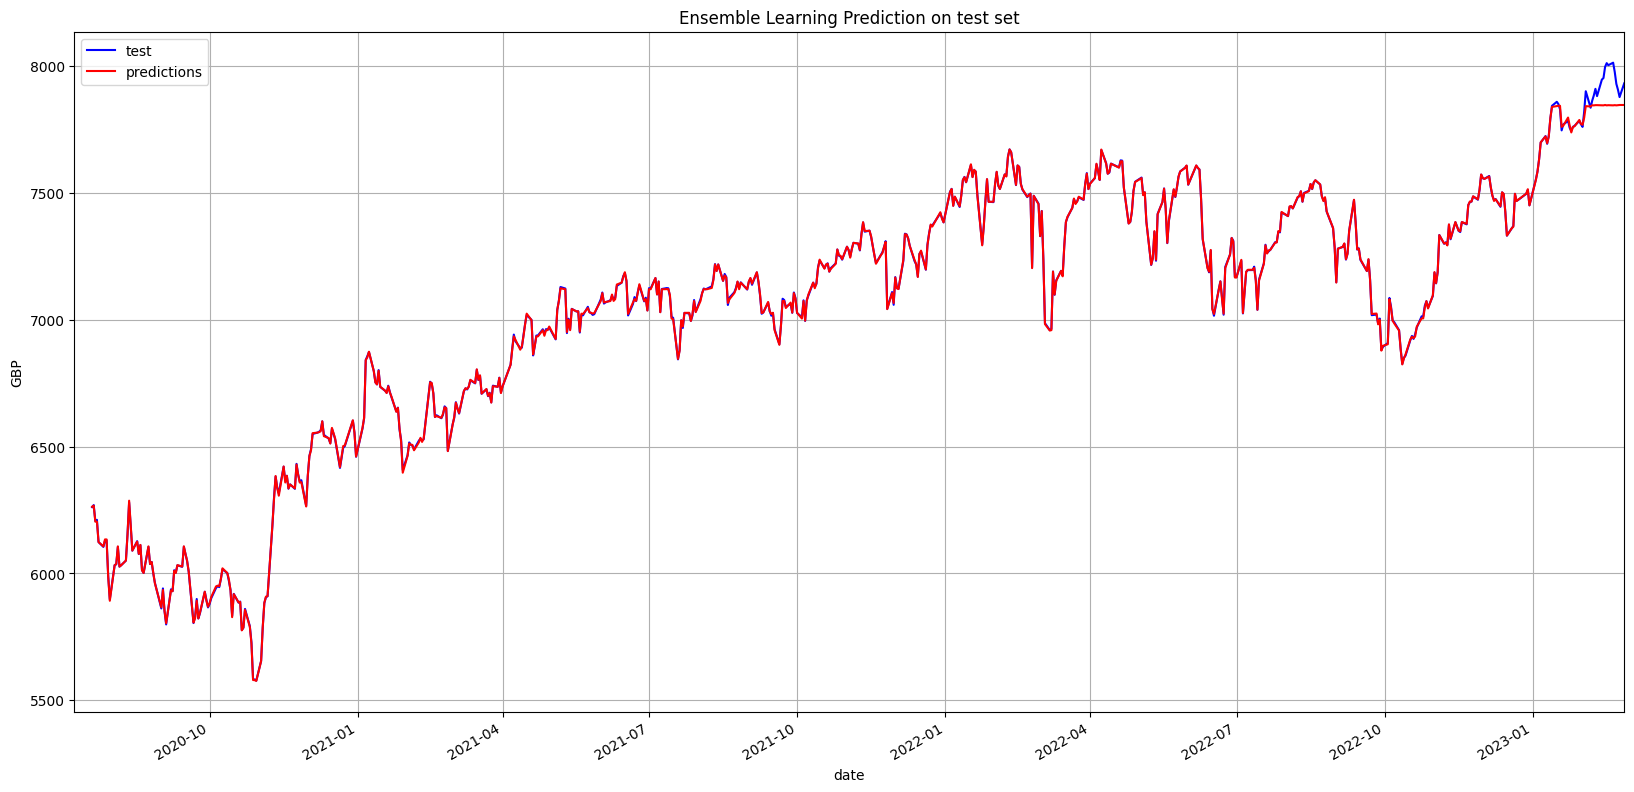

In [ ]:
rcParams['figure.figsize'] = 20, 10 # width 10, height 8
ax = y_test.plot(x='Date', y='Adj Close', style='b-', grid=True)
ax = result_df.plot(x='Date', y='pred', style='r-', grid=True, ax=ax)
ax.legend(['test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("GBP")
ax.set_xlim([date(2020, 7, 9), date(2023, 2, 27)])
#ax.set_ylim([130, 155])
ax.set_title("Ensemble Learning Prediction on test set")
ax.plot()

In [ ]:
xgb = {'RMSE Test': 20.631410319122867, 'RMSE Train': 3.509958502614032, 'MAPE Test': 0.0008102629208728763, 'MAPE Train': 0.0004157200699110514, 'R-squared': 0.99848206481843}
rf = {'RMSE Test':13.716645710273717, 'RMSE Train': 1.1303273468355421, 'MAPE Test':0.00042138236112605217, 'MAPE Train': 6.402228934115143e-05, 'R-squared': 0.9993290483324585}
#ensemble = {'RMSE': 228.32, 'MAPE': 2.61, 'R-squared': 0.56}

# Create a pandas dataframe with the performance metrics for each model
df = pd.DataFrame({'Random Forest': rf, 'Xgboost': xgb})
df = df.T # transpose the dataframe to make the models as rows
df.round(3)

,RMSE Test,RMSE Train,MAPE Test,MAPE Train,R-squared
Random Forest,13.717,1.13,0.000,0.0,0.999
Xgboost,20.631,3.51,0.001,0.0,0.998


In [ ]:
ensemble = {'RMSE': 16.644205931219414, 'MAPE': 0.0005613560369967842, 'R-squared':  0.999012080506537}
df=pd.DataFrame({'Ensemble':ensemble})
df.round(3)

,Ensemble
MAPE,0.001
R-squared,0.999
RMSE,16.644
